# 의사 결정 나무 실습

### 패키지 import 및 데이터 load

In [1]:
from sklearn import datasets

In [2]:
data = datasets.load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


데이터 셋의 형태를 파악하기 위해 데이터를 출력해본다. 데이터셋의 형태는 딕셔너리 형태로, key가 data와 target으로 구분되어있다. 친절하게 scikit-learn에서는 데이터를 미리 전처리해두어서 data(X, 독립변수), target(Y, 종속변수)로 구분지어놨다.

In [3]:
print(data)

{'data': array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 

입력받은 데이터를 X,Y로 구분하여 처리한다. x 데이터의 형태를 확인하기 위해 아래와 같이 진행한다

In [4]:
x = data['data']
y = data['target']
print(x.shape)

(569, 30)


### 데이터 분할

데이터 분할은 scikit-learn에서 제공하는 train_test_split을 이용하면 편리하다. 아래와 같이 split을 하게되면 하나의 데이터로 부터 특정 비율만큼을 트레이닝셋으로, 나머지를 테스트셋으로 구분하여 활용할 수 있다.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# 데이터 분할
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 30), (171, 30), (398,), (171,))

### Training Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

scikit-learn에서의 모델 트레이닝은 매우 간단한데, 아래와 같이 특정 모델의 객체를 생성 한 후, 각 객체에 공통적으로 존재하는 fit함수를 사용하면 주어진 데이터에 대해서 학습을 진행한다.

In [23]:
# 모델 객체 생성 및 fit
decisiontree= DecisionTreeClassifier()
decisiontree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

모델이 얼마나 fitting이 되었는지 confusion matrix와 accuracy로 확인한다.


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
# 학습 데이터에 대한 confusion matrix 생성 (Y 실제값, Y 예측값)
cm = confusion_matrix(Y_train, decisiontree.predict(X_train))
print(cm)

[[149   0]
 [  0 249]]


In [13]:
# 학습 데이터에 대한 accuracy 를 출력하세요 (Y 실제값, Y 예측값)
score = accuracy_score(Y_train, decisiontree.predict(X_train))
print(score)

1.0


In [14]:
# 테스트 데이터에 대한 confusion matrix 생성 (Y 실제값, Y 예측값)
cm= confusion_matrix(Y_test, decisiontree.predict(X_test))
print(cm)

[[ 63   0]
 [  0 108]]


In [16]:
# 테스트 데이터에 대한 accuracy 를 출력하세요 (Y 실제값, Y 예측값)
score= accuracy_score(Y_test, decisiontree.predict(X_test))
print(score)

1.0


현재 트레이닝이 되어있는 것을 보면 학습 데이터에 대해 정확도가 1이다. 이는 학습 데이터에 대해 과적합되어있다는 의미이다. 왜 이런가..?

이는, 우리가 사용한 decision tree의 파라미터 세팅을 보면 확인 할 수 있다. 현재 아무런 세팅을 하지 않고 진행을 했으므로 모두 default로 설정이 되어있고, 그렇다면 이렇게 과적합이 일어난 이유는 어떤것인지 확인할 필요가 있다.

max_depth : int or None, optional (default=None)
- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

파라미터 중 max_depth 옵션을 보면 특정 값으로 설정하지 않을 경우 모든 잎이 pure해질 때까지 분기를 하는 것이다. 즉, 앞서 개념에서 배운 가지치기가 되어있지 않은 형태이다. 이와 밀접히 관련된 또하나의 파라미터는 min_samples_leaf이다.

min_samples_leaf : int, float, optional (default=1) 마지막 노드에 몇개 data를 둘건지 정도.
- The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

즉, 우리는 다른 파라미터 뿐만아니라 이 두 가지 파라미터에 대해서 신경써서 학습을 진행해줘야한다.

 - max_depth를 4로, min_samples_leaf를 3으로 옵션설정 하여 새롭게 fitting한 후, 학습과 테스트 셋에 대한 성능을 확인하세요


In [27]:
# 새 모델 fitting
decisiontree_new= DecisionTreeClassifier(max_depth= 4, min_samples_leaf=3)
decisiontree_new.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
# 학습 데이터 성능확인
score = accuracy_score(Y_train, decisiontree_new.predict(X_train))
print(score)

0.977386934673


In [29]:
# 테스트 데이터 성능확인
score = accuracy_score(Y_test, decisiontree_new.predict(X_test))
print(score)

0.947368421053


결과를 보면, 학습 데이터의 성능은 떨어졌지만 테스트 데이터의 성능이 높아져 좀 더 일반화가 진행된 트리가 학습됨을 알 수 있다.

추가로, 트리 알고리즘을 활용했을 경우, 모델에서 각 변수 별 가중치 및 중요도를 확인 할 수 있다. 이는 모델의 속성값인 feature importance 를 이용한다. 이러한 feature importance를 이용하여 트리를 통해 주요 변수를 추출 할 수도 있다.

In [30]:
print(decisiontree_new.feature_importances_)  
#어떤변수가 중요한 지를 보여줌. 얼마나 기여하는지.그래서 이거 사용하면 좋다

[ 0.          0.02321003  0.          0.          0.          0.          0.
  0.0102927   0.          0.00377399  0.          0.          0.          0.0513779
  0.          0.          0.          0.          0.          0.
  0.09319857  0.          0.          0.          0.          0.
  0.01856803  0.79957877  0.          0.        ]


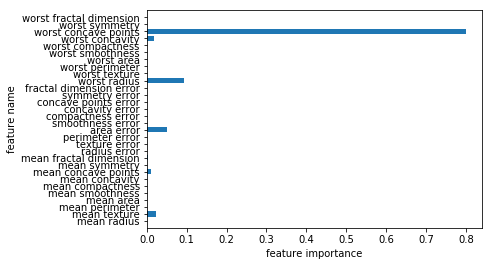

In [31]:
import matplotlib.pyplot as plt
import numpy as np

n_features = X_train.shape[1]
plt.barh(range(n_features), decisiontree_new.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data.feature_names)
plt.xlabel("feature importance")
plt.ylabel("feature name")
plt.ylim(-1, n_features)
plt.show()

# 특정변수만 select해서 다시 모델을 만들다던가.. 할수 있음

In [ ]:
# 트리 visualization 가능